In [1]:
# XGBOOST WIN OR LOSE   

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:


# URL of the CSV file
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-19/vb_matches.csv'

# Reading the CSV file from the URL into a DataFrame
vb_matches = pd.read_csv(url)

vb_matches

,circuit,tournament,country,year,date,gender,match_num,w_player1,w_p1_birthdate,w_p1_age,...,l_p1_tot_blocks,l_p1_tot_digs,l_p2_tot_attacks,l_p2_tot_kills,l_p2_tot_errors,l_p2_tot_hitpct,l_p2_tot_aces,l_p2_tot_serve_errors,l_p2_tot_blocks,l_p2_tot_digs
0,AVP,Huntington Beach,United States,2002,2002-05-24,M,1,Kevin Wong,1972-09-12,29.694730,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN
1,AVP,Huntington Beach,United States,2002,2002-05-24,M,2,Brad Torsone,1975-01-14,27.356605,...,2.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,AVP,Huntington Beach,United States,2002,2002-05-24,M,3,Eduardo Bacil,1971-03-11,31.203285,...,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,AVP,Huntington Beach,United States,2002,2002-05-24,M,4,Brent Doble,1970-01-03,32.386037,...,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0.0,NaN
4,AVP,Huntington Beach,United States,2002,2002-05-24,M,5,Albert Hannemann,1970-05-04,32.054757,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76751,FIVB,Oslo,Norway,2019,2019-08-28,M,24,Christian Sorum,1995-12-03,23.734428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76752,FIVB,Oslo,Norway,2019,2019-08-28,M,25,Anders Mol,1997-07-02,22.154689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76753,FIVB,Oslo,Norway,2019,2019-08-28,M,26,Christian Sorum,1995-12-03,23.734428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76754,FIVB,Oslo,Norway,2019,2019-08-28,M,27,Hendrik Mol,1994-03-10,25.467488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:


# Assuming vb_matches is already loaded as shown in the previous example
# Transform the DataFrame
vb_matches['w_attacks'] = vb_matches['w_p1_tot_attacks'] + vb_matches['w_p2_tot_attacks']
vb_matches['w_kills'] = vb_matches['w_p1_tot_kills'] + vb_matches['w_p2_tot_kills']
vb_matches['w_errors'] = vb_matches['w_p1_tot_errors'] + vb_matches['w_p2_tot_errors']
vb_matches['w_aces'] = vb_matches['w_p1_tot_aces'] + vb_matches['w_p2_tot_aces']
vb_matches['w_serve_errors'] = vb_matches['w_p1_tot_serve_errors'] + vb_matches['w_p2_tot_serve_errors']
vb_matches['w_blocks'] = vb_matches['w_p1_tot_blocks'] + vb_matches['w_p2_tot_blocks']
vb_matches['w_digs'] = vb_matches['w_p1_tot_digs'] + vb_matches['w_p2_tot_digs']
vb_matches['l_attacks'] = vb_matches['l_p1_tot_attacks'] + vb_matches['l_p2_tot_attacks']
vb_matches['l_kills'] = vb_matches['l_p1_tot_kills'] + vb_matches['l_p2_tot_kills']
vb_matches['l_errors'] = vb_matches['l_p1_tot_errors'] + vb_matches['l_p2_tot_errors']
vb_matches['l_aces'] = vb_matches['l_p1_tot_aces'] + vb_matches['l_p2_tot_aces']
vb_matches['l_serve_errors'] = vb_matches['l_p1_tot_serve_errors'] + vb_matches['l_p2_tot_serve_errors']
vb_matches['l_blocks'] = vb_matches['l_p1_tot_blocks'] + vb_matches['l_p2_tot_blocks']
vb_matches['l_digs'] = vb_matches['l_p1_tot_digs'] + vb_matches['l_p2_tot_digs']

# Select only the columns of interest and drop rows with missing values
vb_parsed = vb_matches[['circuit', 'gender', 'year', 'w_attacks', 'w_kills', 'w_errors', 'w_aces', 'w_serve_errors', 'w_blocks', 'w_digs', 'l_attacks', 'l_kills', 'l_errors', 'l_aces', 'l_serve_errors', 'l_blocks', 'l_digs']].dropna()

vb_parsed.head()


,circuit,gender,year,w_attacks,w_kills,w_errors,w_aces,w_serve_errors,w_blocks,w_digs,l_attacks,l_kills,l_errors,l_aces,l_serve_errors,l_blocks,l_digs
1845,AVP,M,2004,45.0,24.0,7.0,0.0,2.0,5.0,11.0,57.0,31.0,17.0,1.0,5.0,2.0,17.0
1846,AVP,M,2004,71.0,31.0,16.0,3.0,8.0,7.0,21.0,61.0,25.0,13.0,0.0,1.0,5.0,23.0
1847,AVP,M,2004,43.0,26.0,5.0,2.0,4.0,7.0,10.0,36.0,24.0,7.0,1.0,3.0,2.0,11.0
1848,AVP,M,2004,42.0,32.0,5.0,2.0,3.0,7.0,7.0,41.0,26.0,8.0,0.0,2.0,4.0,12.0
1849,AVP,M,2004,44.0,31.0,1.0,0.0,5.0,6.0,15.0,45.0,18.0,6.0,1.0,3.0,1.0,7.0


In [4]:

# Select and Rename Columns for Winners
winners = vb_parsed[['circuit', 'gender', 'year'] + [col for col in vb_parsed.columns if col.startswith('w_')]].copy()
winners.columns = winners.columns.str.replace('w_', '', regex=False)
winners['win'] = 'win'

# Select and Rename Columns for Losers
losers = vb_parsed[['circuit', 'gender', 'year'] + [col for col in vb_parsed.columns if col.startswith('l_')]].copy()
losers.columns = losers.columns.str.replace('l_', '', regex=False)
losers['win'] = 'lose'

# Concatenate DataFrames
vb_df = pd.concat([winners, losers], ignore_index=True)

# Convert Character Columns to Categories (Optional, analogous to R's factor)
for col in vb_df.select_dtypes(include=['object']).columns:
    vb_df[col] = vb_df[col].astype('category')

# Remove the 'win' column
new_data0 = vb_df.drop(columns=['win'])

new_data0.head()


,circuit,gender,year,attacks,kills,errors,aces,serve_errors,blocks,digs
0,AVP,M,2004,45.0,24.0,7.0,0.0,2.0,5.0,11.0
1,AVP,M,2004,71.0,31.0,16.0,3.0,8.0,7.0,21.0
2,AVP,M,2004,43.0,26.0,5.0,2.0,4.0,7.0,10.0
3,AVP,M,2004,42.0,32.0,5.0,2.0,3.0,7.0,7.0
4,AVP,M,2004,44.0,31.0,1.0,0.0,5.0,6.0,15.0


TypeError: boxplot() got an unexpected keyword argument 'alpha'

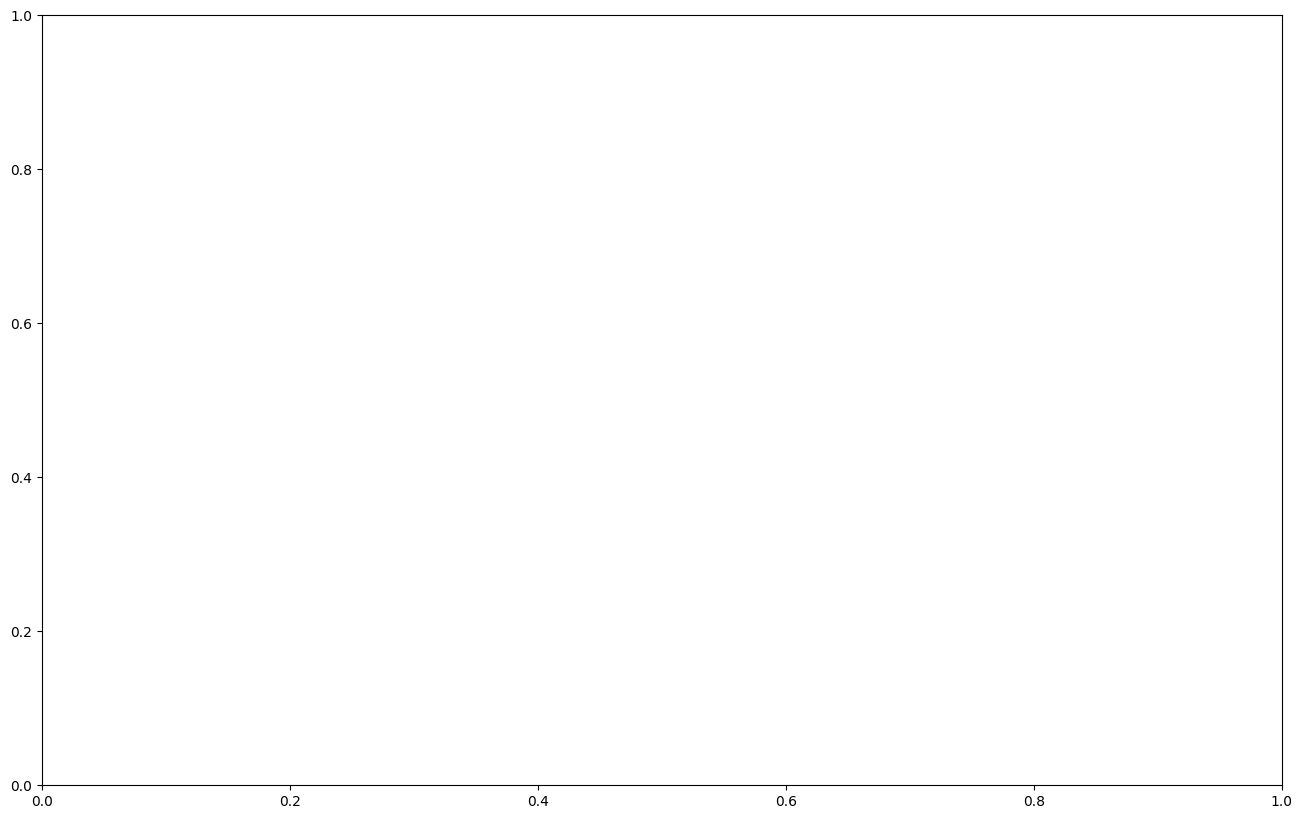

In [5]:


# Assuming vb_df is already prepared as previously discussed

# Pivot the DataFrame from wide to long format
vb_long = pd.melt(vb_df, id_vars=['circuit', 'gender', 'year', 'win'], var_name='stat', value_name='value')

# Filter out only the relevant stats for the boxplot
stats = ['attacks', 'kills', 'errors', 'aces', 'serve_errors', 'blocks', 'digs']
vb_long = vb_long[vb_long['stat'].isin(stats)]

# Create the boxplot
plt.figure(figsize=(16, 10))
sns.boxplot(x='gender', y='value', hue='win', data=vb_long, palette="Set3", alpha=0.4)
plt.title('Statistical Distribution by Gender and Win Condition')

# Since seaborn does not support facet_wrap directly like ggplot2, use FacetGrid for a similar effect
g = sns.FacetGrid(vb_long, col='stat', hue='win', col_wrap=4, sharex=False, sharey=False, palette="Set3")
g.map(sns.boxplot, 'gender', 'value', alpha=0.4).add_legend()

plt.show()
